In [17]:
#Sawyer Thomas 
#University of Washington Transformative Robotics Lab
#code to generate a valid lattice configuration for an arbitrary edge configuration

# Imports
import numpy as np
import matplotlib.pyplot as plt


 
def plot_design(xs, ys,wid):
    '''plot a given lattice design
       inputs: xs: array of x values, ys: array of y values, wid: length of each horizontal linkage
       returns: none'''
    x,y=np.shape(np.array(xs))
    tall=y
    wide=x
    fig = plt.figure(figsize=(20,20))
#     plt.figsize=(20, 20)
    plt.axis('equal')
    for i in range(len(xs)):
        plt.plot(xs[i], ys[i], 'go-', label='line 1', linewidth=2, markersize=2)
        xs=list(xs)
    test=1
    for h in range(0,tall):
        for w in range(wide-1):
            if h%2==0 and w%2==0:
                plt.plot((xs[w][h],xs[w][h]+wid),(ys[w][h],ys[w][h]), 'go-', label='line 1', linewidth=2,markersize=2)
            if h%2==1 and w%2==1:
                plt.plot((xs[w][h],xs[w][h]+wid),(ys[w][h],ys[w][h]), 'go-', label='line 1', linewidth=2,markersize=2)




In [2]:
# def convert_0to_neg(shape_arr):
#     x,y=np.shape(np.array(shape_arr))
#     for h in range(y):
#         for w in range(x):
#                 if shape_arr[w][h]==0:shape_arr[w][h]=-1
#     return shape_arr

#test whether the given array will work
def test_plot(charges,plot=False, start=0):
    '''test whether a given lattice combination will have a valid trajectory
        inputs: charges: a 2D array of [-1s and 1s],plot: boolean to decide if we should plot the array, 
                start: boolean to say if the current layer is odd or even
        outputs: boolean for lattice validity'''

    x,y=np.shape(np.array(charges))
    tall=y+1
    wide=x
    #width values for array
    a=1.2
    wid=3
    
    #set y values (these remain constant throughout)
    ys=[]
    height=list(range(tall))
    for w in range(wide):
        ys.append(height)
    xs=list(np.zeros((wide,tall)))

    #assign the top values
    xs[0][0]=0
    for p in range(1,wide):
        xs[p][0]=xs[p-1][0]+wid
        if p%2==0:
            xs[p][0]+=(charges[p-1][0]*a-charges[p][0]*a)

    #assign values everywhere in the array
    for h in range(1,tall):
        for w in range(wide):
            xs[w][h]=xs[w][h-1]+charges[w][h-1]*a

    #test to see if the array matches valid conditions
    for h in range(0,tall):
        for w in range(wide-1):
            if h%2==start and w%2==0:
                if abs(xs[w][h]+wid-xs[w+1][h])>a/100:
                    return 0
            if h%2!=start and w%2==1:
                if abs(xs[w][h]+wid-xs[w+1][h])>a/100:
                    return 0
                
    #plot array if specified
    if plot==True:
        xs=np.array(xs)
        xs=np.fliplr(xs)
        xs=list(xs)
        yscale=1
        ys=[[i*yscale for i in k]for k in ys]
        plot_design(xs,ys,wid)
    return 1


In [3]:
def set_totals(prof):
    '''creates an array with the profile horizontal values
    input: prof: array of 1,-1 values
    outputs: totals: array with horizontal values'''
    totals=[0]
    for i in range(len(prof)):
        totals+=[prof[i]+totals[i]]
    return totals

def def_line(totals,connectors):
    '''defines the constrained points in the next column
    input: totals: current array of horizontal values, connectors: location of the horizontal linkages
    outputs: next line: partially filled array of the next column horizontal values'''
    next_line=[0]*(len(totals)-1)
    for i in range(len(totals)-2):
        if connectors[i]==1:
            if totals[i]<totals[i+2]:
                next_line[i]=1
                next_line[i+1]=1
            elif totals[i]>totals[i+2]:
                next_line[i]=-1
                next_line[i+1]=-1
    return next_line



def fill_line(totals,next_line,connectors):
    '''fills in the remaining array spaces with the profile horizontal values
    input: totals: current column values, next_line: partially filled array for next column, 
            connectors: location of current horizontal linkages
    outputs: totals: array with horizontal values'''
    mid=(min(totals)+max(totals))/2
    for i in range(len(next_line)-1):
        if connectors[i]==1 and next_line[i]==0:
            if totals[i]>mid+.5:
                next_line[i]=-1
                next_line[i+1]=1
            else:
                next_line[i]=1
                next_line[i+1]=-1
    if next_line[0]==0:
        next_line[0]=-next_line[1]
    if next_line[-1]==0:
        next_line[-1]=-next_line[-2]
    return next_line
            
            
        
                
        
        

In [4]:
def create_next(prof,connect=0):
    '''creates and fills in the values for the next column
    input: prof: array of 1,-1 values, connect: odd or even column number
    outputs: next_line: array with horizontal values for next column'''
    if connect==0:
        connectors=[0,1]*int(len(profile)/2)+[0]
    else:
        connectors=[1,0]*int(len(profile)/2)+[1]
    totals=set_totals(prof)
    next_line=def_line(totals,connectors)
    next_line=fill_line(totals,next_line,connectors)
    return next_line



def check_end(prof):
    '''tests to see if the generated lattice is a valid configuration
    input: prof: array of 1,-1 values
    outputs: boolean for valid or not valid'''
    totals=set_totals(prof)
    for i in totals:
        if i>1 or i<-1:
            return 0
    return 1

In [29]:

def generate_shape(profile,layers=0):
    '''
    Generates and combine each layer of the profile and displays the lattice
    inputs:
    profile- an edge profile made up of positive and negative slopes organized [-1,1,1,-1,-1...]
    layers (must be odd)- automatically defaults to the min layers to get to a flat back, or can enter a specified number of layers
    '''
    full_shape=[profile]
    connect=0
    new_prof=profile
#     if layer number is specified, cells are generated for each layer
    if layers!=0:
        for i in range(layers):
            if connect%2==0:
                new_prof=create_next(new_prof,1)
            else:
                new_prof=create_next(new_prof,0)
            full_shape=[new_prof]+full_shape
            connect+=1
#     if no layer number is specified then only the minimum required layers are generated
    else:
        correct_end=0
        layers=0
        while correct_end==0 or connect%2!=1:
            layers+=1
            if connect%2==0:
                new_prof=create_next(new_prof,1)
            else:
                new_prof=create_next(new_prof,0)
            full_shape=[new_prof]+full_shape
            correct_end=check_end(new_prof)
            connect+=1
#     print(full_shape)
    works=test_plot(full_shape,True)
    print('total layers = '+str(layers))
#     print(works)
    

total layers = 9


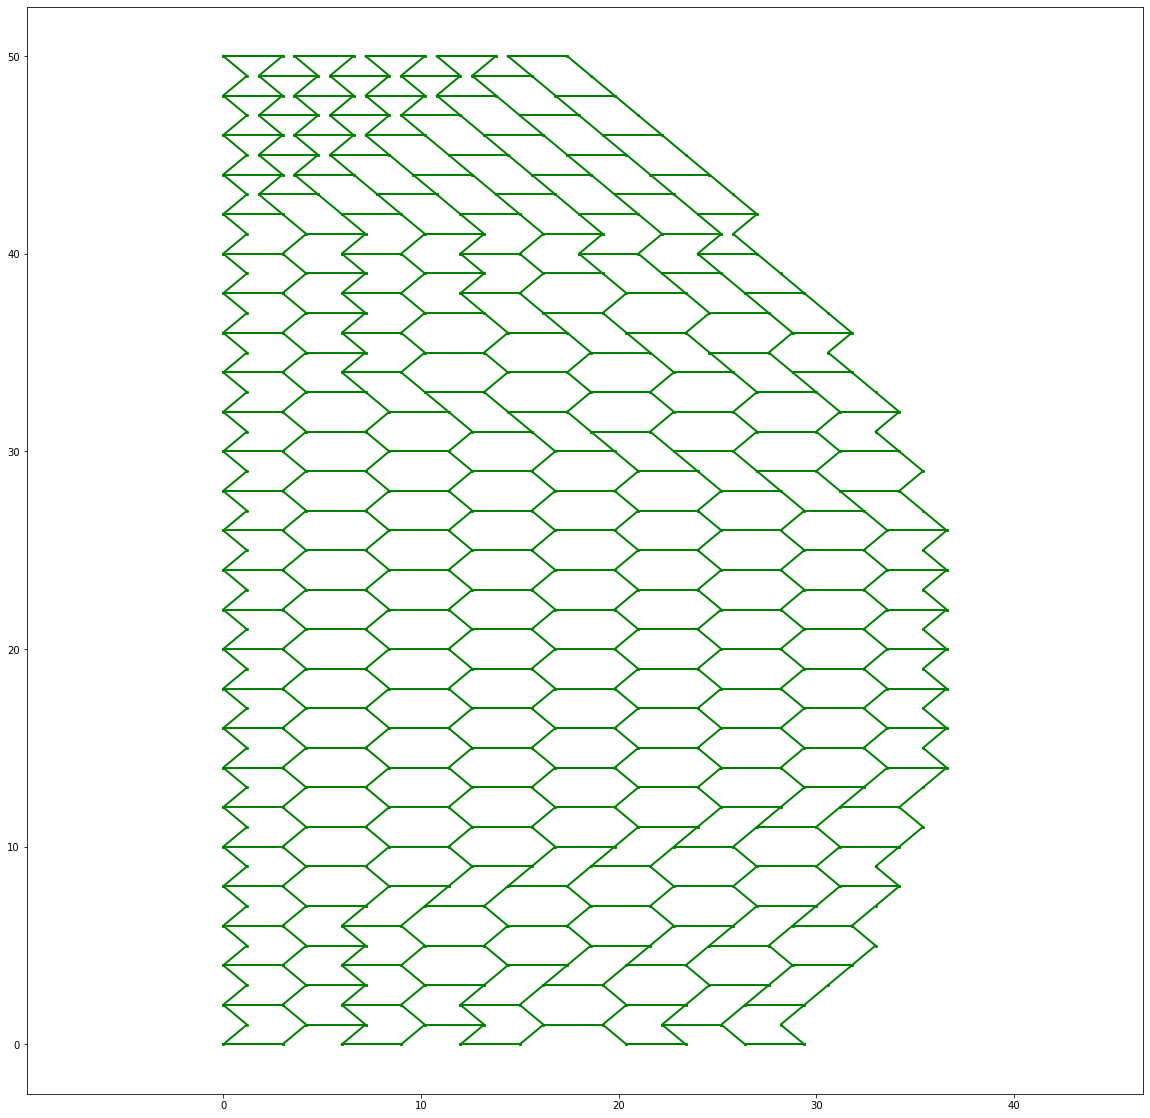

In [30]:
'''create an array of -1s and 1 and run code to generate the full lattice that matches the profile
    must be an even number of input values'''


#curve profile
profile=[-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,1,-1,-1,-1,1,-1,-1,1,-1,-1,1,-1,1,-1,1,-1,1,-1,1,-1,1,-1,1,1,-1,1,1,-1,1,1,-1,1,1,1,1,-1]


#heart profile
# profile=[1,-1,-1,-1,-1,-1,-1,1,1,1,1,1,1,-1]

# half beaker profile
# profile=[-1,1,-1,1,1,1,-1,1,1,-1,1,1,-1,1,-1,1,-1,1,-1,1,-1,1,-1,1,-1,1,-1,1,-1,1,-1,1,-1,1,-1,1,-1,-1,1,-1,-1,1,-1,-1,1,-1,-1,1,-1,-1,1,-1,-1,1,-1,-1,1,-1,-1,1,-1,-1,1,-1,-1,1,-1,-1,1,-1,1,-1,1,-1,1,1,-1,1,1,1,1,1]


profile = [ -x for x in profile]
# generate profile, will automatically fill to flat in minimum number of layers
#add a value as the second input to define the number of layers
generate_shape(profile)
# generate_shape(profile,3 )